In [ ]:
# Mounting the Google Colab Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing Libraries:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Importing the Absenteeism At Work Dataset:

In [ ]:
aw=pd.read_csv('/content/drive/My Drive/DS Datasets/DT Project Datasets/Absenteeism_at_work.csv')

Identification of data types:

In [ ]:
aw.dtypes

ID                                  int64
Reason for absence                  int64
Month of absence                    int64
Day of the week                     int64
Seasons                             int64
Transportation expense              int64
Distance from Residence to Work     int64
Service time                        int64
Age                                 int64
Work load Average/day              object
Hit target                          int64
Disciplinary failure                int64
Education                           int64
Son                                 int64
Social drinker                      int64
Social smoker                       int64
Pet                                 int64
Weight                              int64
Height                              int64
Body mass index                     int64
Absenteeism time in hours           int64
dtype: object

Size of the dataset:

In [ ]:
aw.shape

(740, 21)

Statistical Summary of Numberic Variables:

In [ ]:
aw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   ID                               740 non-null    int64 
 1   Reason for absence               740 non-null    int64 
 2   Month of absence                 740 non-null    int64 
 3   Day of the week                  740 non-null    int64 
 4   Seasons                          740 non-null    int64 
 5   Transportation expense           740 non-null    int64 
 6   Distance from Residence to Work  740 non-null    int64 
 7   Service time                     740 non-null    int64 
 8   Age                              740 non-null    int64 
 9   Work load Average/day            740 non-null    object
 10  Hit target                       740 non-null    int64 
 11  Disciplinary failure             740 non-null    int64 
 12  Education                        740

In [ ]:
aw.describe

<bound method NDFrame.describe of      ID  Reason for absence  ...  Body mass index  Absenteeism time in hours
0    11                  26  ...               30                          4
1    36                   0  ...               31                          0
2     3                  23  ...               31                          2
3     7                   7  ...               24                          4
4    11                  23  ...               30                          2
..   ..                 ...  ...              ...                        ...
735  11                  14  ...               30                          8
736   1                  11  ...               29                          4
737   4                   0  ...               34                          0
738   8                   0  ...               35                          0
739  35                   0  ...               25                          0

[740 rows x 21 columns]>

In [ ]:
aw.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,"2,39,554",97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,"2,39,554",97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,"2,39,554",97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,"2,39,554",97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,"2,39,554",97,0,1,2,1,0,1,90,172,30,2


Non-Graphical Univariate Analysis:

In [ ]:
#Finding null values

print(aw.isnull().sum(axis = 0))

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64


In [ ]:
aw.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [ ]:
#number of unique value in each variable

aw.nunique()

ID                                 36
Reason for absence                 28
Month of absence                   13
Day of the week                     5
Seasons                             4
Transportation expense             24
Distance from Residence to Work    25
Service time                       18
Age                                22
Work load Average/day              38
Hit target                         13
Disciplinary failure                2
Education                           4
Son                                 5
Social drinker                      2
Social smoker                       2
Pet                                 6
Weight                             26
Height                             14
Body mass index                    17
Absenteeism time in hours          19
dtype: int64

Graphical Univariate Analysis:

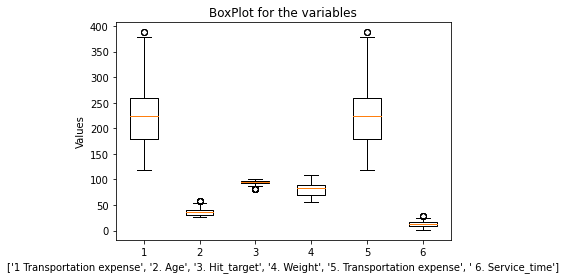

In [ ]:
#Boxplot for variable

plt.boxplot([aw['Transportation expense'],  aw['Age'], aw['Hit target'], aw['Weight'], aw['Transportation expense'],aw['Service time']])
plt.xlabel(['1 Transportation expense', '2. Age', '3. Hit_target', '4. Weight', '5. Transportation expense',' 6. Service_time'])
plt.title("BoxPlot for the variables")
plt.ylabel('Values')
plt.show()

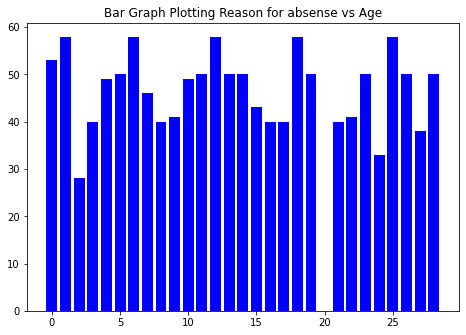

In [ ]:
#Bar Graph

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(aw['Reason for absence'],aw['Age'], color = 'b')
plt.title('Bar Graph Plotting Reason for absense vs Age')
plt.show()

In [ ]:
#checking for correaltion between variables

aw.corr()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
ID,1.000000,-0.064245,-0.000043,0.034468,0.098495,-0.224163,-0.486160,-0.272704,0.040899,0.018789,0.004502,-0.036254,0.002767,-0.451338,-0.010826,-0.041418,-0.254222,0.076363,-0.306924,-0.017997
Reason for absence,-0.064245,1.000000,-0.083858,0.116319,-0.117925,-0.119381,0.161831,0.048425,-0.078608,0.088943,-0.545054,-0.047357,-0.055364,0.065441,-0.115702,-0.055911,-0.000269,-0.079267,0.037205,-0.173116
Month of absence,-0.000043,-0.083858,1.000000,-0.006528,0.407770,0.137525,-0.003887,-0.062862,-0.001520,-0.460453,0.107946,-0.066128,0.079031,0.056226,-0.038603,0.047787,0.023278,-0.068942,0.051046,0.024345
Day of the week,0.034468,0.116319,-0.006528,1.000000,0.046493,0.033988,0.118026,0.021252,0.004459,0.030986,-0.015120,0.058516,0.098079,0.041772,0.013156,-0.028885,-0.128980,-0.082133,-0.103578,-0.124361
Seasons,0.098495,-0.117925,0.407770,0.046493,1.000000,0.036995,-0.063108,-0.010904,-0.012089,-0.061154,0.151766,-0.002951,0.046950,-0.045982,-0.048671,0.012356,-0.026278,-0.033737,-0.011031,-0.005615
Transportation expense,-0.224163,-0.119381,0.137525,0.033988,0.036995,1.000000,0.262183,-0.349887,-0.227542,-0.080193,0.109222,-0.055065,0.383001,0.145117,0.044356,0.400080,-0.207435,-0.194496,-0.136517,0.027585
Distance from Residence to Work,-0.486160,0.161831,-0.003887,0.118026,-0.063108,0.262183,1.000000,0.131730,-0.145886,-0.013865,-0.056527,-0.259605,0.054230,0.452196,-0.075369,0.205941,-0.047859,-0.353372,0.113772,-0.088363
Service time,-0.272704,0.048425,-0.062862,0.021252,-0.010904,-0.349887,0.131730,1.000000,0.670979,-0.007840,-0.000221,-0.213000,-0.047128,0.353141,0.072424,-0.440301,0.455975,-0.053135,0.499718,0.019029
Age,0.040899,-0.078608,-0.001520,0.004459,-0.012089,-0.227542,-0.145886,0.670979,1.000000,-0.039224,0.104304,-0.221882,0.056984,0.213183,0.121738,-0.231226,0.418730,-0.062997,0.470688,0.065760
Hit target,0.018789,0.088943,-0.460453,0.030986,-0.061154,-0.080193,-0.013865,-0.007840,-0.039224,1.000000,-0.147971,0.101062,-0.014091,-0.102480,0.051254,0.007201,-0.044947,0.093267,-0.088939,0.026695


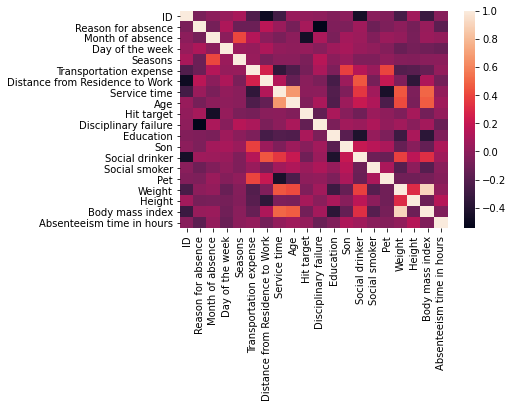

In [ ]:
#Checking correlation using Heatmap

sns.heatmap(aw.corr())

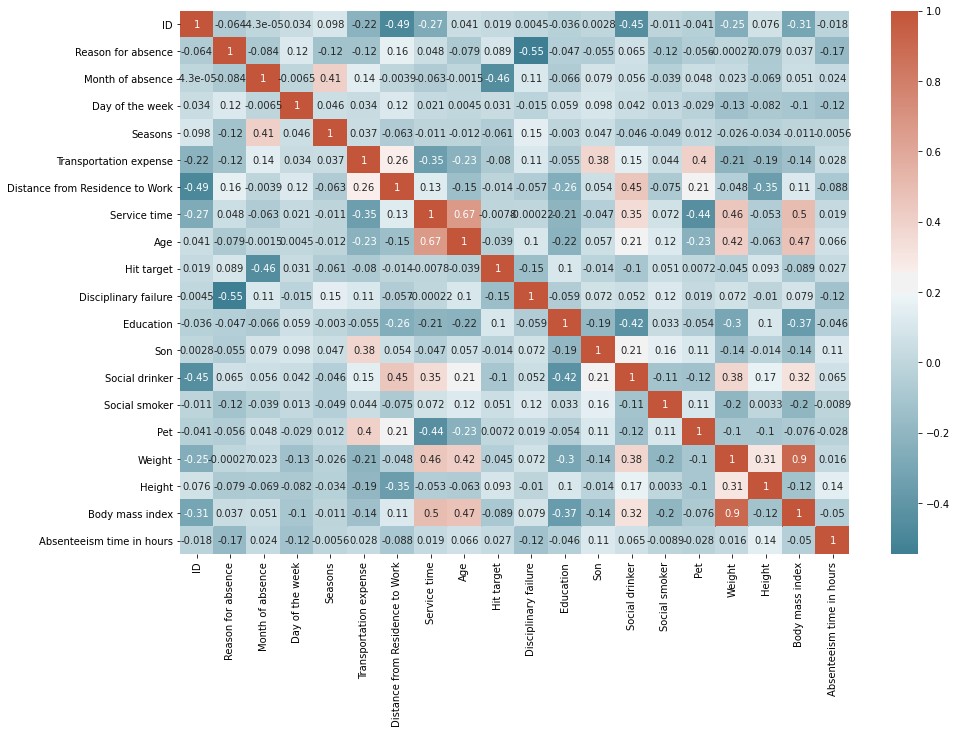

In [ ]:
corr = aw.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

Choosing a Model

In [ ]:
#dropping Work load Average/day column
aw.drop('Work load Average/day ', axis = 1,inplace=True)

In [ ]:
##Standardization
for i in aw:
    if i == 'Absenteeism time in hours':
        continue
    aw[i] = (aw[i] - aw[i].mean())/aw[i].std()

In [ ]:
aw.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,-0.636731,0.804394,0.19663,-0.643512,-1.389235,1.010725,0.429265,0.101701,-0.532508,0.638254,-0.238884,-0.433564,0.893119,0.872282,-0.280376,0.192719,0.851097,-0.019033,0.775408,4
1,1.631615,-2.278583,0.19663,-0.643512,-1.389235,-1.543335,-1.120935,1.241985,2.091446,0.638254,4.180473,-0.433564,-0.017223,0.872282,-0.280376,-0.565857,1.472060,0.975168,1.008755,0
2,-1.362601,0.448666,0.19663,0.059884,-1.389235,-0.632238,1.440266,1.241985,0.239243,0.638254,-0.238884,-0.433564,-0.927564,0.872282,-0.280376,-0.565857,0.773477,-0.350434,1.008755,2
3,-0.999666,-1.448551,0.19663,0.763279,-1.389235,0.861365,-1.660136,0.329758,0.393593,0.638254,-0.238884,-0.433564,0.893119,0.872282,3.561816,-0.565857,-0.856552,-0.681834,-0.624678,4
4,-0.636731,0.448666,0.19663,0.763279,-1.389235,1.010725,0.429265,0.101701,-0.532508,0.638254,-0.238884,-0.433564,0.893119,0.872282,-0.280376,0.192719,0.851097,-0.019033,0.775408,2


In [ ]:
#dummifying data required for spliting the data

aw = pd.get_dummies(aw)
aw.iloc[:, aw.columns != 'Absenteeism time in hours'].head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index
0,-0.636731,0.804394,0.19663,-0.643512,-1.389235,1.010725,0.429265,0.101701,-0.532508,0.638254,-0.238884,-0.433564,0.893119,0.872282,-0.280376,0.192719,0.851097,-0.019033,0.775408
1,1.631615,-2.278583,0.19663,-0.643512,-1.389235,-1.543335,-1.120935,1.241985,2.091446,0.638254,4.180473,-0.433564,-0.017223,0.872282,-0.280376,-0.565857,1.472060,0.975168,1.008755
2,-1.362601,0.448666,0.19663,0.059884,-1.389235,-0.632238,1.440266,1.241985,0.239243,0.638254,-0.238884,-0.433564,-0.927564,0.872282,-0.280376,-0.565857,0.773477,-0.350434,1.008755
3,-0.999666,-1.448551,0.19663,0.763279,-1.389235,0.861365,-1.660136,0.329758,0.393593,0.638254,-0.238884,-0.433564,0.893119,0.872282,3.561816,-0.565857,-0.856552,-0.681834,-0.624678
4,-0.636731,0.448666,0.19663,0.763279,-1.389235,1.010725,0.429265,0.101701,-0.532508,0.638254,-0.238884,-0.433564,0.893119,0.872282,-0.280376,0.192719,0.851097,-0.019033,0.775408


In [ ]:
#Import Libraries for decision tree

from sklearn import tree
import sklearn
from sklearn.metrics import accuracy_score
#import sklearn.cross_validation 
from sklearn.model_selection import train_test_split

In [ ]:
#spliting the data

X_train, X_test, y_train, y_test = train_test_split(aw.iloc[:, aw.columns != 'Absenteeism time in hours'], aw.iloc[:, 8], test_size = 0.25)

In [ ]:
#Decision Tree Regressor

# Importing libraries for Decision Tree 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Building model on top of training dataset
fit_DT = DecisionTreeRegressor(max_depth = 2).fit(X_train,y_train)

# Calculating RMSE for training data to check for over fitting
pred_train_DT = fit_DT.predict(X_train)
rmse_for_train_DT = np.sqrt(mean_squared_error(y_train,pred_train_DT))

# Calculating RMSE for test data to check accuracy
pred_test_DT = fit_DT.predict(X_test)
rmse_for_test_DT =np.sqrt(mean_squared_error(y_test,pred_test_DT))

print("RMSE For Train = "+str(rmse_for_train_DT))
print("RMSE For Test = "+str(rmse_for_test_DT))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test_DT)))

RMSE For Train = 0.2872000108412014
RMSE For Test = 0.2518473342952795
R^2 Score(coefficient of determination) = 0.9255538778740325


In [ ]:
#Gradient Boosting Regressor
# Importing library for GradientBoosting
from sklearn.ensemble import GradientBoostingRegressor

# Building model on top of training dataset
fit_GB = GradientBoostingRegressor().fit(X_train, y_train)

# Calculating RMSE for training data to check for over fitting
pred_train_GBR = fit_GB.predict(X_train)
rmse_for_train_GBR = np.sqrt(mean_squared_error(y_train,pred_train_GBR))

# Calculating RMSE for test data to check accuracy
pred_test_GBR = fit_GB.predict(X_test)
rmse_for_test_GBR =np.sqrt(mean_squared_error(y_test,pred_test_GBR))

print("RMSE IN TRAIN = "+str(rmse_for_train_GBR))
print("RMSE IN Test = "+str(rmse_for_test_GBR))
GBR = str(r2_score(y_test,pred_test_GBR))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test_GBR)))

RMSE IN TRAIN = 0.0003089085117658215
RMSE IN Test = 0.00024376503183125528
R^2 Score(coefficient of determination) = 0.9999999302554662


In [ ]:
#Linear Regression Model
from sklearn.linear_model import LinearRegression

# Building model on top of training dataset
fit_LR = LinearRegression().fit(X_train , y_train)

# Calculating RMSE for training data to check for over fitting
pred_train_LR = fit_LR.predict(X_train)
rmse_for_train_LR = np.sqrt(mean_squared_error(y_train,pred_train_LR))

# Calculating RMSE for test data to check accuracy
pred_test_LR = fit_LR.predict(X_test)
rmse_for_test_LR =np.sqrt(mean_squared_error(y_test,pred_test_LR))

print("RMSE IN Train = "+str(rmse_for_train_LR))
print("RMSE IN TEST = "+str(rmse_for_test_LR))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test_LR)))

RMSE IN Train = 1.211084118469611e-15
RMSE IN TEST = 1.1320359785137402e-15
R^2 Score(coefficient of determination) = 1.0


In [ ]:
#RandomForestRegressor
# Importing libraries for Random Forest
from sklearn.ensemble import RandomForestRegressor

# Building model on top of training dataset
fit_RF = RandomForestRegressor(n_estimators = 500).fit(X_train,y_train)

# Calculating RMSE for training data to check for over fitting
pred_train_RFR = fit_RF.predict(X_train)
rmse_for_train_RFR = np.sqrt(mean_squared_error(y_train,pred_train_RFR))

# Calculating RMSE for test data to check accuracy
pred_test_RFR = fit_RF.predict(X_test)
rmse_for_test_RFR =np.sqrt(mean_squared_error(y_test,pred_test_RFR))

print("RMSE  ForTrain = "+str(rmse_for_train_RFR))
print("RMSE for Test = "+str(rmse_for_test_RFR))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test_RFR)))

RMSE  ForTrain = 0.009356615931731635
RMSE for Test = 0.0028626802721223327
R^2 Score(coefficient of determination) = 0.9999903813736576


In [ ]:
#Saving the model as a pickle in a file

from sklearn.externals import joblib

joblib.dump(GBR,'AbsenteeismAtWork.pkl')

['AbsenteeismAtWork.pkl']